# 第7章 支持向量机

## 习题7.1

&emsp;&emsp;比较感知机的对偶形式与线性可分支持向量机的对偶形式。

**解答：**

**解答思路：**
1. 列出感知机的原始形式；
2. 写出感知机的对偶形式；
3. 列出线性可分支持向量机的原始形式；
4. 写出线性可分支持向量机的对偶形式；
5. 比较感知机和线性可分支持向量机的对偶形式。

**解答步骤：**

**第1步：感知机的原始形式**

&emsp;&emsp;根据书中第2.3.1节的感知机学习算法的原始形式：
> 给定一个训练数据集
> 
> $$ T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\} $$
> 
> 其中，$x_i \in \mathcal{X} = R^n, y_i \in \mathcal{Y}=\{-1,1\}, i=1,2,\cdots,N$，求参数$w,b$，使其为以下损失函数极小化问题的解
> 
> $$ \min \limits_{w,b} L(w,b)=-\sum_{x_i \in M} y_i(w \cdot x_i + b) $$
> 其中$M$为误分类点的集合。

&emsp;&emsp;根据书中第2章的算法2.1：

> **算法2.1（感知机学习算法的原始形式）**  
> 输入：训练数据集$T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$，其中$x_i \in \mathcal{X} = R^n, y_i \in \mathcal{Y}=\{-1,+1\}, i=1,2,\cdots,N$；学习率$\eta$（$0 < \eta \leqslant 1$）；  
输出：$w,b$；感知机模型$f(x)=\text{sign}(w \cdot x + b)$  
（1）选取初值$w_0,b_0$；  
（2）在训练集中选取数据$(x_i, y_i)$；  
（3）如果$y_i(w \cdot x_i +b) \leqslant 0$，
> $$ w \leftarrow w + \eta y_i x_i \\
b \leftarrow b + \eta y_i $$  
>（4）转至步骤（2），直至训练集中没有误分类点。

**第2步：感知机的对偶形式**

&emsp;&emsp;根据书中第2章的算法2.2：

> **算法2.2（感知机学习算法的对偶形式）**  
> 输入：线性可分的数据集$T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$，其中$x_i \in R^n, y_i \in \{-1, +1\}, i=1,2,\cdots,N$；学习率$\eta$（$0 < \eta \leqslant 1$）；
输出：$a,b$；感知机模型$\displaystyle f(x)=\text{sign} \left( \sum_{j=1}^N \alpha_j y_j x_j \cdot x + b \right)$，其中$\alpha = (\alpha_1, \alpha_2,\cdots, \alpha_N)^T$  
（1）$\alpha \leftarrow 0,b \leftarrow 0$；  
（2）在训练集中选取数据$(x_i, y_i)$；  
（3）如果$\displaystyle y_i\left( \sum_{j=1}^N \alpha_j y_j x_j \cdot x + b \right) \leqslant 0$，
> $$ \alpha_i \leftarrow \alpha_i + \eta \\
b \leftarrow b + \eta y_i $$  
>（4）转至（2），直至训练集中没有误分类数据。

&emsp;&emsp;根据书中第2.3.3节对偶形式的基本思想

> 从学习过程不难看出，最后学习到的$w,b$可以分别表示为
> $$ w=\sum_{i=1}^N \alpha_i y_i x_i\\ 
b=\sum_{i=1}^N \alpha_i y_i $$
> 这里，$\alpha_i \geqslant 0, i=1,2,\cdots,N$

&emsp;&emsp;综上所述：
1. 感知机的原始形式中的损失函数：
$$
\min_{w,b} L(w,b)=-\sum_{x_i \in M} y_i(w \cdot x_i + b)
$$
2. 感知机的对偶形式中的损失函数：可知$w,b$表示为$\langle x_i,y_i \rangle$的线性组合形式，则
$$
\min_{w,b} L(w,b) = \min_{\alpha} L(\alpha) = - \sum \limits_{x_i \in M} ( y_i ( \sum_{j=1}^N \alpha_j y_j x_j \cdot x_i + \sum_{j=1}^N \alpha_j y_j ) )
$$
其中，$\alpha = (\alpha_1, \alpha_2,\cdots, \alpha_N)^T$

**第3步：线性可分支持向量机的原始形式**

&emsp;&emsp;根据书中第7.1.3节的线性可分支持向量机学习的最优化问题，可作为原始最优化问题(7.13)~(7.14)：
> $$ \begin{align}
\displaystyle \min_{w,b} \quad & \displaystyle \frac{1}{2} \|w\|^2 \tag{7.13} \\
\text{s.t.} \quad & y_i(w \cdot x_i + b) -1 \geqslant 0, \quad i=1, 2,\cdots, N \tag{7.14} \\
\end{align} $$ 

**第4步：线性可分支持向量机的对偶形式**

&emsp;&emsp;根据书中第7章的算法7.2：

> **算法7.2（线性可分支持向量机学习算法）**  
> 输入：线性可分训练集$T=\{(x_1,y_1),(x_2,y_2), \cdots, (x_N,y_N)\}$，其中$x_i \in \mathcal{X} = R^n$，$y_i \in \mathcal{Y} = \{-1, +1\}$，$i=1,2,\cdots, N$；  
输出：分离超平面和分类决策函数。  
（1）构造并求解约束最优化问题
> $$ \begin{array}{cl} 
\displaystyle \min_{\alpha} & \displaystyle \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) - \sum_{i=1}^N 
\alpha_i \\
\text{s.t.} & \displaystyle \sum_{i=1}^N \alpha_i y_i = 0 \\
& \alpha_i \geqslant 0, \quad i=1,2,\cdots,N
\end{array} $$
> 求得最优解$\alpha^*=(\alpha_1^*, \alpha_2^*, \cdots, \alpha_N^*)^T$。  
>（2）计算
> $$ w^* = \sum_{i=1}^N \alpha_i^* y_j x_i $$
> 并选择$\alpha^*$的一个正分量$\alpha_j^* > 0$，计算
> $$ b^*=y_i-\sum_{i=1}^N \alpha_i^* y_i (x_i \cdot x_j) $$
>（3）求得分离超平面
> $$ w^* \cdot x + b^* = 0 $$
> 分类决策函数：
> $$ f(x) = \text{sign}(w^* \cdot x + b^*) $$

综上所述：
1. 线性可分支持向量机的原始形式中的损失函数：
$$
\min_{w,b} L(w,b) = \frac{1}{2} \|w\|^2
$$


2. 线性可分支持向量机的对偶形式中的损失函数：根据定理7.2，可知$w,b$表示为$\langle x_i,y_i \rangle$的线性组合形式，则

$$
\min_{w,b} L(w,b) = \min_{\alpha} L(\alpha) = \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) - \sum_{i=1}^N 
\alpha_i
$$
其中，$\alpha = (\alpha_1, \alpha_2,\cdots, \alpha_N)^T$

**第5步：感知机和线性可分支持向量机对偶形式的比较**

1. 在两者的对偶形式中，$w,b$都可以表示为$\langle x_i,y_i \rangle$的线性组合形式；
2. 在两者的对偶形式中，都可以通过求解$\alpha=(\alpha_1, \alpha_2, \cdots, \alpha_N)^T$，最后代入由$x_i,y_i,\alpha_i$表示的$w$和$b$公式中，从而求解最优化问题的解$w^*$和$b^*$；
3. 感知机学习得到一个分隔超平面，而线性可分支持向量机学习得到所有分隔超平面中的间隔最大分隔超平面。

## 习题7.2

&emsp;&emsp;已知正例点$x_1=(1,2)^T,x_2=(2,3)^T,x_3=(3,3)^T$，负例点$x_4=(2,1)^T,x_5=(3,2)^T$，试求最大间隔分离平面和分类决策函数，并在图中画出分离超平面、间隔边界及支持向量。  

**解答：**

**解答思路：**
1. 通过调用sklearn.svm的SVC类构建模型，根据题目中的数据训练模型，得到$w$、$b$和支持向量；
2. 调用matplotlib库，画出分离超平面、间隔边界和支持向量。

**解答步骤：**

**第1步：训练模型，得到$w$、$b$和支持向量**

In [1]:
from sklearn.svm import SVC

# 加载数据
X = [[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]]
y = [1, 1, 1, -1, -1]

# 训练SVM模型
clf = SVC(kernel='linear', C=10000)
clf.fit(X, y)

# 得到w、b和支持向量
print("w =", clf.coef_)
print("b =", clf.intercept_)
print("support vectors =", clf.support_vectors_)

w = [[-1.  2.]]
b = [-2.]
support vectors = [[3. 2.]
 [1. 2.]
 [3. 3.]]


可得：
1. 最大间隔分离超平面：$-x^{(1)}+2x^{(2)}-2=0$  
2. 分类决策函数：$f(x)=\text{sign}(-x^{(1)}+2x^{(2)}-2)$  
3. 支持向量：$x_1=(3,2)^T,x_2=(1,2)^T, x_3=(3,3)^T$  

**第2步：在图中画出分离超平面、间隔边界和支持向量**

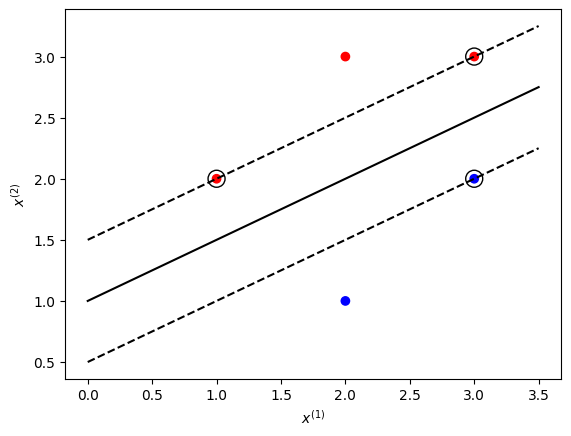

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制数据点
color_seq = ['red' if v==1 else 'blue' for v in y]
plt.scatter([i[0] for i in X], [i[1] for i in X], c=color_seq)

# 得到x轴的所有点
xaxis = np.linspace(0, 3.5)
w = clf.coef_[0]

# 计算斜率
a = -w[0] / w[1]

# 得到分离超平面
y_sep = a * xaxis - (clf.intercept_[0]) / w[1]

# 下边界超平面
b = clf.support_vectors_[0]
yy_down = a * xaxis + (b[1] - a * b[0])

# 上边界超平面
b = clf.support_vectors_[-1]
yy_up = a * xaxis + (b[1] - a * b[0])

# 绘制超平面
plt.plot(xaxis, y_sep, 'k-')
plt.plot(xaxis, yy_down, 'k--')
plt.plot(xaxis, yy_up, 'k--')

# 绘制支持向量
plt.xlabel('$x^{(1)}$')
plt.ylabel('$x^{(2)}$')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=150, facecolors='none', edgecolors='k')

plt.show()

## 习题7.3

&emsp;&emsp;线性支持向量机还可以定义为以下形式：
$$
\begin{array}{cl} 
\displaystyle \min \limits_{w,b,\xi} & \displaystyle \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i^2 \\
\text{s.t.} & y_i(w \cdot x_i + b) \geqslant 1 - \xi_i, \quad i=1,2,\cdots, N \\
& \xi_i \geqslant 0, \quad i=1,2,\cdots, N
\end{array}
$$
试求其对偶形式。

**解答：**

**解答思路：**  

参考书中第7.2.2节“学习的对偶算法”内容`
1. 根据附录C 拉格朗日对偶性，写出拉格朗日函数；
2. 对 $L(w,b,\xi,\alpha,\mu)$ 求 $w,b,\xi$ 的极小；
3. 对 $\displaystyle \min \limits_{w,b,\xi} L(w,b,\xi,\alpha,\mu)$ 求 $\alpha$ 的极大；
4. 整理得到对偶形式。

**解答步骤：**

**第1步：原始问题的拉格朗日函数**

&emsp;&emsp;根据书中附录C拉格朗日对偶性：
> 假设$f(x),c_i(x),h_j(x)$是定义在$R^n$上的连续可微函数。考虑约束最优化问题
> $$ \begin{align}
\displaystyle \min \limits_{x \in R^n} \quad & f(x) \tag{C.1} \\
\text{s.t.} \quad & c_i(x) \leqslant 0, \quad i=1,2,\cdots, k \tag{C.2} \\
\quad & h_j(x) = 0, \quad j=1,2,\cdots, l \tag{C.3} 
\end{align} $$
> 称此约束最优化问题为原始最优化问题，或原始问题。
> 
> 引入广义拉格朗日函数
> $$ L(x,\alpha, \beta) = f(x) + \sum_{i=1}^k \alpha_i c_i(x) + \sum_{j=1}^l \beta_j h_j(x) \tag{C.4} $$
> 这里，$x=(x^{(1)}, x^{(2)}, \cdots, x^{(n)})^T \in R^n$，$\alpha_i,\beta_j$是拉格朗日乘子，$\alpha_i \geqslant 0$。考虑$x$的函数：
> 
> $$ \theta_P(x) = \max \limits_{\alpha,\beta:\alpha_i \geqslant 0} L(x, \alpha, \beta) \tag{C.5} $$
> 这里，下标$P$表示原始问题。

&emsp;&emsp;根据书中附录C的原始问题极小化：
> 如果考虑极小化问题
> $$ \min \limits_{x} \theta_P(x) = \min \limits_{x} \max \limits_{\alpha,\beta:\alpha_i \geqslant 0} L(x, \alpha, \beta) $$
> 它是与原始最优化问题(C.1)~(C.3)等价的，即它们有相同的解。问题 $\min \limits_{x} \max \limits_{\alpha,\beta:\alpha_i \geqslant 0} L(x, \alpha, \beta)$ 称为广义拉格朗日函数的极小极大问题。

&emsp;&emsp;根据题意，原始问题为
$$
\begin{array}{cl} 
\displaystyle \min \limits_{w,b,\xi} & \displaystyle \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i^2 \\
\text{s.t.} & y_i(w \cdot x_i + b) \geqslant 1 - \xi_i, \quad i=1,2,\cdots, N \\
& \xi_i \geqslant 0, \quad i=1,2,\cdots, N
\end{array}
$$

&emsp;&emsp;根据最优化函数的对应关系，可得
$$
\left \{ \begin{array}{ll}
\displaystyle f(x) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i^2 \\
c_i^{(1)}(x) = 1 - \xi_i - y_i(w \cdot x_i + b), \quad i = 1,2,\cdots, N \\
c_i^{(2)}(x) = - \xi_i, \quad i = 1,2,\cdots, N 
\end{array} \right.
$$

&emsp;&emsp;根据拉格朗日函数的定义，可得原始问题的拉格朗日函数为
$$
L(w,b,\xi, \alpha, \mu) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i^2 - \sum_{i=1}^N \alpha_i(y_i (w \cdot x_i + b)-1 + \xi_i) - \sum_{i=1}^N \mu_i \xi_i
$$ 
其中，$\alpha_i \geqslant 0, \mu_i \geqslant 0$

**第2步：对$L(w,b,\xi,\alpha,\mu)$求$w,b,\xi$的极小**

&emsp;&emsp;根据拉格朗日对偶性，对偶问题是拉格朗日函数的极大极小问题，先对$L(w,b,\xi,\alpha,\mu)$求$w,b,\xi$的极小，分别对$w,b,\xi$求偏导，并令导数等于0，由
$$
\begin{array}{l}
\displaystyle \nabla_w L(w,b,\xi,\alpha,\mu)  = w - \sum_{i=1}^N \alpha_i y_i x_i = 0 \\ 
\displaystyle \nabla_b L(w,b,\xi,\alpha,\mu)  =  -\sum_{i=1}^N \alpha_i y_i = 0 \\
\displaystyle \nabla_{\xi_i} L(w,b,\xi,\alpha,\mu)  = 2C \xi_i - \alpha_i - \mu_i = 0 
\end{array}
$$

&emsp;&emsp;可得：
$$
\begin{array}{l}
\displaystyle w = \sum_{i=1}^N \alpha_i y_i x_i \\ 
\displaystyle \sum_{i=1}^N \alpha_i y_i = 0 \\
\displaystyle 2C \xi_i - \alpha_i - \mu_i = 0 
\end{array}
$$

&emsp;&emsp;将上式代入到原始问题的拉格朗日函数中，可得
$$
\begin{aligned}
L(w, b, \xi, \alpha, \mu) 
&= \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) +  C \sum_{i=1}^N \xi_i^2 - \sum_{i=1}^N \alpha_i y_i \left( \left( \sum_{j=1}^N \alpha_j y_j x_j \right) \cdot x_i + b \right) \\
& + \sum_{i=1}^N \alpha_i - \sum_{i=1}^N \alpha_i \xi_i - \sum_{i=1}^N \mu_i \xi_i \\
&= -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1}^N \alpha_i + C \sum_{i=1}^N \xi_i^2 - \sum_{i=1}^N \alpha_i \xi_i - \sum_{i=1}^N \mu_i \xi_i \\
&= -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1}^N \alpha_i + C \sum_{i=1}^N \xi_i^2 - \sum_{i=1}^N (\alpha_i + \mu_i) \xi_i \\
&= -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1}^N \alpha_i + C \sum_{i=1}^N \xi_i^2 - \sum_{i=1}^N \left( 2C \xi_i \right) \xi_i \\
&= -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1}^N \alpha_i + C \sum_{i=1}^N \xi_i^2 - 2C \sum_{i=1}^N \xi_i^2 \\
&= -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1}^N \alpha_i - C \sum_{i=1}^N \xi_i^2 \\
&= -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1}^N \alpha_i - C \sum_{i=1}^N \left(\frac{1}{4 C^2}(\alpha_i + \mu_i)^2 \right) \\
&= -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1}^N \alpha_i - \frac{1}{4 C}\sum_{i=1}^N (\alpha_i + \mu_i)^2
\end{aligned}
$$

**第3步：对$\displaystyle \min \limits_{w,b,\xi} L(w,b,\xi,\alpha,\mu)$求$\alpha$的极大**

&emsp;&emsp;根据第2步，对$\displaystyle \min \limits_{w,b,\xi} L(w,b,\xi,\alpha,\mu)$求$\alpha$的极大，可得到对偶问题：
$$
\begin{array}{cl} 
\displaystyle \max \limits_{\alpha} & \displaystyle -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1}^N \alpha_i - \frac{1}{4 C}\sum_{i=1}^N (\alpha_i + \mu_i)^2 \\
\text{s.t.} & \displaystyle \sum_{i=1}^N \alpha_i y_i = 0 \\
& \displaystyle 2C \xi_i - \alpha_i - \mu_i = 0 \\
& \alpha_i \geqslant 0 ,\mu_i \geqslant 0, \xi_i \geqslant 0, \quad i=1,2,\cdots, N
\end{array}
$$

**第4步：进行公式变换，得到对偶形式**

&emsp;&emsp;再将对目标函数求极大转换为求极小，于是得到原始问题的对偶形式
$$
\begin{array}{cl} 
\displaystyle \min \limits_{\alpha} & \displaystyle \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) - \sum_{i=1}^N \alpha_i + \frac{1}{4 C}\sum_{i=1}^N (\alpha_i + \mu_i)^2 \\
\text{s.t.} & \displaystyle \sum_{i=1}^N \alpha_i y_i = 0 \\
& \displaystyle 2C \xi_i - \alpha_i - \mu_i = 0 \\
& \alpha_i \geqslant 0 ,\mu_i \geqslant 0, \xi_i \geqslant 0, \quad i=1,2,\cdots, N
\end{array}
$$

## 习题7.4

&emsp;&emsp;证明内积的正整数幂函数：$$K(x,z)=(x \bullet z)^p$$是正定核函数，这里$p$是正整数，$x,z\in R^n$。

**解答：**

**解答思路：**  
1. 写出正定核函数的判定依据
2. 使用数学归纳法，证明
  1. 当$p=1$时，根据定理7.5，证明$K(x, z)=x \bullet z$是正定核函数
  2. 假设当$p=k$且$k>1$时，$K(x, z)=(x \bullet z)^k$是正定核函数
  3. 证明当$p=k+1$时，$K(x, z)=(x \bullet z)^{k+1}$是正定核函数

**解答步骤：**

**第1步：列出正定核函数的判定依据**

根据书中第7章的定理7.5（正定核的充要条件）：

> **定理7.5（正定核的充要条件）** 设$K: \mathcal{X} \times \mathcal{X} \rightarrow R$是对称函数，则$K(x,z)$为正定核函数的充要条件是对任意$x_i \in \mathcal{X}, i=1,2,\cdots, m$，$K(x, z)$对应的Gram矩阵：
> $$ K = [K(x_i, x_j)]_{m \times m} $$
> 是半正定矩阵。

**第2步：使用数学归纳法，证明$K(x, z)=(x \bullet z)^p$是正定核函数**

1. 当$p=1$时，$K(x, z)=x \bullet z$，对任意$c_1,c_2,\cdots,c_n \in \mathbf{R}$，有

$$
\begin{aligned} 
\sum_{i,j=1}^n c_i c_j K(x_i,x_j) 
&= \sum_{i,j=1}^n c_i c_j (x_i \bullet x_j) \\
&= \left(\sum_{i=1}^m c_i x_i \right) \bullet \left(\sum_{j=1}^m c_j x_j \right) \\
&= \Bigg\|\left( \sum_{i=1}^m c_i x_i \right)\Bigg\|^2 \geqslant 0
\end{aligned}
$$
可得，当$p=1$时，$K(x, z)=x \bullet z$对应的Gram矩阵是半正定的，根据定理7.5，可知$K(x,z)=x \bullet z$是正定核函数。

2. 假设$p=k$且$k$是大于1的正整数时，$K(x, z)=(x \bullet z)^k$是正定核函数

根据书中第7章的定义7.6的（核函数）：
> **定义7.6（核函数）** 设$\mathcal{X}$是输入空间（欧式空间$R^n$的子集或离散集合），又设$\mathcal{H}$为特征空间（希尔伯特空间），如果存在一个从$\mathcal{X}$到$\mathcal{H}$的映射
> $$ \phi(x):\mathcal{X} \rightarrow \mathcal{H} $$
> 使得对所有$x,z \in \mathcal{X}$，函数$K(x,z)$满足条件
> $$ K(x,z) = \phi(x) \bullet \phi(z) $$
> 则称$K(x,z)$为核函数，$\phi(x)$为映射函数，式中$\phi(x) \bullet \phi(z)$为$\phi(x)$和$\phi(z)$的内积。

故存在一个输入空间为$R^n$，$R^n$到$\mathcal{H}$的映射
$$
\phi(x):R^n \rightarrow \mathcal{H}
$$
使得对所有$x,z \in R^n$，函数$K(x,z)=(x \bullet z)^k$满足条件
$$
K(x,z) = \phi(x) \bullet \phi(z)
$$
可假设$\phi(x)=(f_1(x), f_2(x), \cdots, f_m(x))^T$，其中$x=(x^{(1)}, x^{(2)}, \cdots, x^{(n)})^T$

3. 当$p=k+1$时  
$$
\begin{aligned}
K(x,z) 
&= (x \bullet z)^{k+1} \\
&= (x \bullet z)^k (x \bullet z) \\
&= (\phi(x) \bullet \phi(z))(x \bullet z) \\
&= (f_1(x)f_1(z) + f_2(x)f_2(z) + \cdots + f_m(x)f_m(z))(x^{(1)}z^{(1)} + x^{(2)}z^{(2)} + \cdots + x^{(n)}z^{(n)}) \\
&= f_1(x)f_1(z)(x^{(1)}z^{(1)} + x^{(2)}z^{(2)} + \cdots + x^{(n)}z^{(n)}) \\ 
& \quad + f_2(x)f_2(z)(x^{(1)}z^{(1)} + x^{(2)}z^{(2)} + \cdots + x^{(n)}z^{(n)}) + \cdots \\
& \quad + f_m(x)f_m(z)(x^{(1)}z^{(1)} + x^{(2)}z^{(2)} + \cdots + x^{(n)}z^{(n)}) \\
&= (f_1(x)x^{(1)})(f_1(z)z^{(1)}) + (f_1(x)x^{(2)})(f_1(z)z^{(2)}) + \cdots \\ 
& \quad + (f_1(x)x^{(n)})(f_1(z)z^{(n)}) \\
& \quad + (f_2(x)x^{(1)})(f_2(z)z^{(1)}) + (f_2(x)x^{(2)})(f_2(z)z^{(2)}) + \cdots \\
& \quad + (f_2(x)x^{(n)})(f_2(z)z^{(n)}) + \cdots \\
& \quad + (f_m(x)x^{(1)})(f_m(z)z^{(1)}) + (f_m(x)x^{(2)})(f_m(z)z^{(2)}) + \cdots \\ 
& \quad + (f_m(x)x^{(n)})(f_m(z)z^{(n)}) 
\end{aligned}
$$

&emsp;&emsp;可得
$$
\begin{aligned}
\phi'(x) &= (f_1(x)x^{(1)}, f_1(x)x^{(2)}, \cdots, f_1(x)x^{(n)}, \\
& \quad f_2(x)x^{(1)}, f_2(x)x^{(2)}, \cdots, f_2(x)x^{(n)}, \\
& \quad f_m(x)x^{(1)}, \cdots, f_m(x)x^{(n)})^T
\end{aligned}
$$  

&emsp;&emsp;故存在从$R^n$到希尔伯特空间$\mathcal{H}$的映射$\phi'(x)$，使得
$$
K(x,z) = (x \bullet z)^{k+1} = \phi'(x) \bullet \phi'(z)
$$

&emsp;&emsp;根据《矩阵分析》书中定理7.5.3：

> **7.5.3定理** 如果$A,B \in M_n$是半正定矩阵，则$A \bullet B$也是半正定矩阵，此外如果$A$和$B$都是正定矩阵，则$A \bullet B$也是正定矩阵。  
> 其中，$A \bullet B$称为$A$和$B$的Hadamard乘积。

&emsp;&emsp;由根据书中定理7.5，可得$K(x,z)=(x \bullet z)^{k+1}$是正定核函数。

&emsp;&emsp;根据数学归纳法可得：  
&emsp;&emsp;当$p$是正整数，$x,z\in R^n$时，内积的正整数幂函数：$$K(x,z)=(x \bullet z)^p$$是正定核函数。

## 参考文献

【1】Roger A.Horn, Charles R.Johnson, 杨奇(译). 矩阵分析[M]. 2005(1):324